**Brief description of the problem and data**

## Overview

### Natural Language Processing

Natural Language Processing (NLP) is a branch of artificial intelligence that encompasses the tasks of understanding, interpreting, and generating human language in a way that is meaningful and useful. Some example use cases of NLP are: translating text from one langugage to another, summarizing large volumes of text, and generating text content on demand. In this project I will use NLP to process tweets.
<br><br>
Widespread social media use has enabled rapid dissemination of information when disaster strikes, heping to spread awareneses and aid in recovery. Twitter has become a critical communication channel during disasters, with more disaster aid groups programmatically monitoring tweets to watch for breaking news. It can be difficult to determine if a tweet is actually about a disaster or not. <br><br>


### Data Decription

The purpose of this project is to predict whether a tweet is about a disaster (1) or not (0). 

Each sample has:
- the text of a tweet
- a keyword from that tweet
- the location the tweet was sent from

The site specifically notes that both keyword and location may be left blank. 
The training set has variable 'target' that deneotes whether the tweet is about a real disaster or not.

Sample sumbissions should contain two columns, id and target. Submissions will be evaluated using [F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).


GitHub Link for this project: [Link](https://github.com/alysonlea/NLP-Tweets)


## Exploratory Data Analysis

### Inspect the Data

In [1]:
import pandas as pd

# store the file paths for the train and test files
train_path = "/Users/alyso/Desktop/nlp-getting-started/train.csv"
test_path = "/Users/alyso/Desktop/nlp-getting-started/test.csv"

# import the data sets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [2]:
# check the dimensions of the data
print('Training Set Shape = {}'.format(train_data.shape))
print('Test Set Shape = {}'.format(test_data.shape))

Training Set Shape = (7613, 5)
Test Set Shape = (3263, 4)


In [3]:
# inspect the first few rows of the training data
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


It's clear there are missing values in both 'keyword' and 'location' columns as mentioned in the overview. I will handle this during cleaning later.

In [4]:
# inspect the first few rows of the test data
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


The same is true for the test set.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Notice the amount of null data

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


### Visualize the Data

In [7]:
# put in distribution of labels

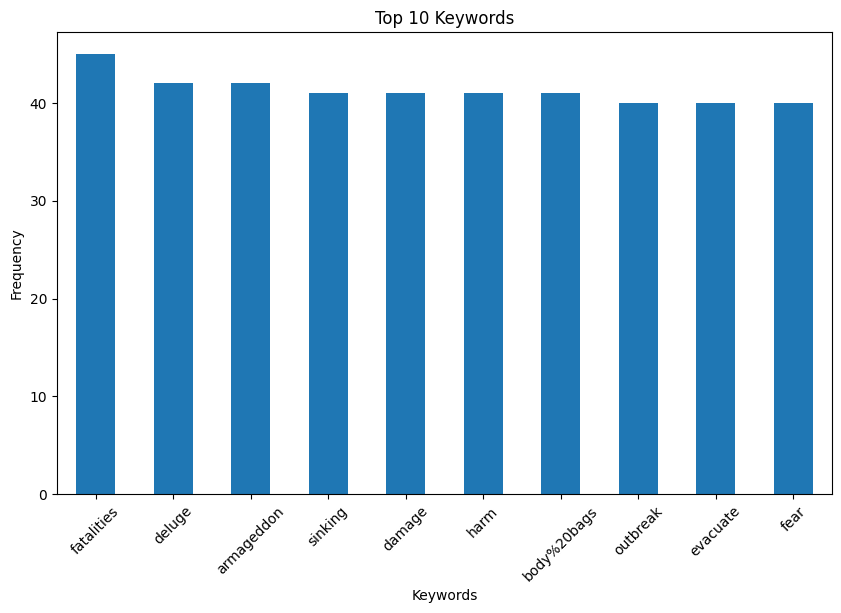

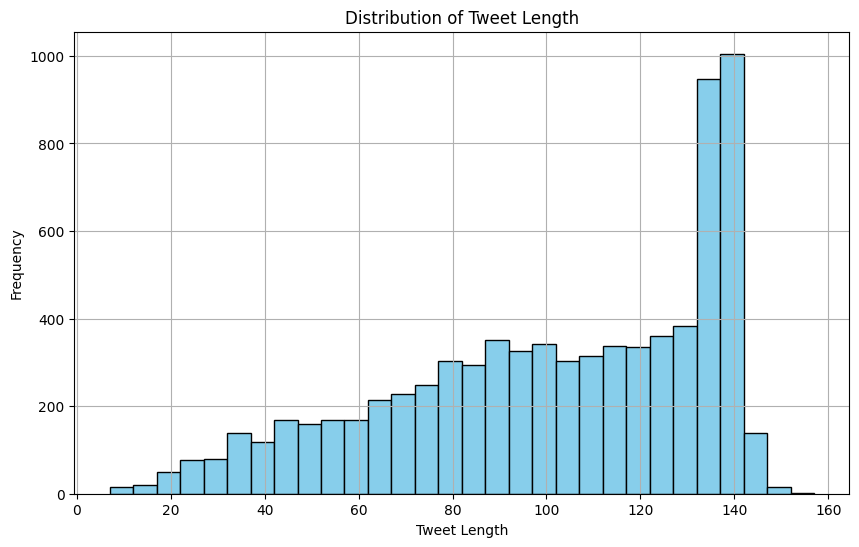

In [8]:
import matplotlib.pyplot as plt

# Bar chart of top n keywords
def plot_top_keywords(data, n=10):
    top_keywords = data['keyword'].value_counts().head(n)
    top_keywords.plot(kind='bar', figsize=(10, 6))
    plt.title('Top {} Keywords'.format(n))
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Visualization of distribution of tweet length
def plot_tweet_length_distribution(data):
    data['tweet_length'] = data['text'].apply(len)
    plt.figure(figsize=(10, 6))
    plt.hist(data['tweet_length'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Tweet Length')
    plt.xlabel('Tweet Length')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# plot the top 10 keywords
plot_top_keywords(train_data, n=10)
plot_tweet_length_distribution(train_data)


Most of the top 10 keywords make sense. One 'body%20bags' might be an import issue or a data recording error, as it doesn't make much sense.

There are many tweets right around the 140 characgter length mark, this makes sense since for a long time that was the character limit on Twitter.

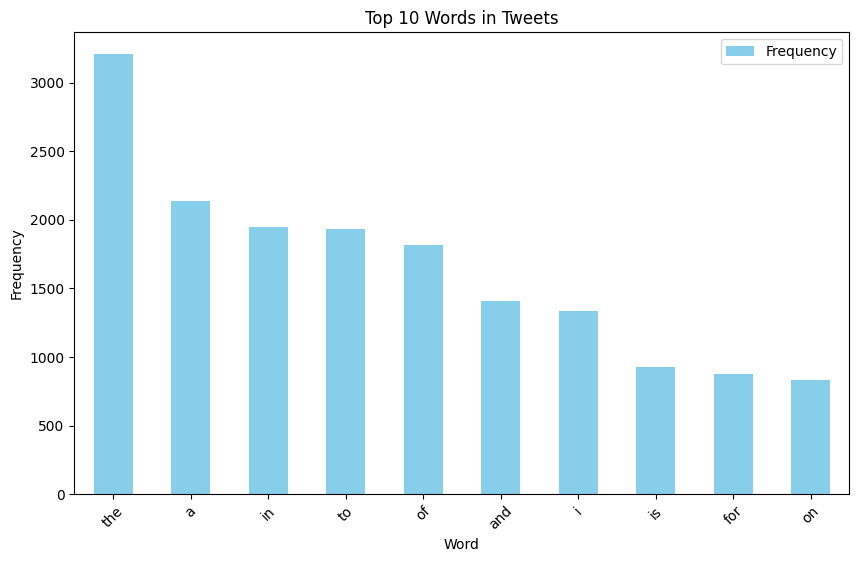

In [9]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Function to preprocess text and count word frequencies
def preprocess_and_count_words(text_column):
    # Join all tweets into a single string
    all_tweets = ' '.join(text_column)
    # Tokenize the text into words
    words = all_tweets.split()
    # Convert words to lowercase
    words = [word.lower() for word in words]
    # Count word frequencies
    word_counts = Counter(words)
    return word_counts

# Function to plot top n words
def plot_top_words(word_counts, n=10):
    top_words = word_counts.most_common(n)
    df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
    df.plot(kind='bar', x='Word', y='Frequency', color='skyblue', figsize=(10, 6))
    plt.title('Top {} Words in Tweets'.format(n))
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# plot top 10 words across all tweets
word_counts = preprocess_and_count_words(train_data['text'])
plot_top_words(word_counts, n=10)


Unsurprisingly, the most common words in the dataset are prepositions and articles. We will have to clear these types of words from the data set when cleaning.

Let's investigate the missing data in the 'keyword' and 'location' columns.

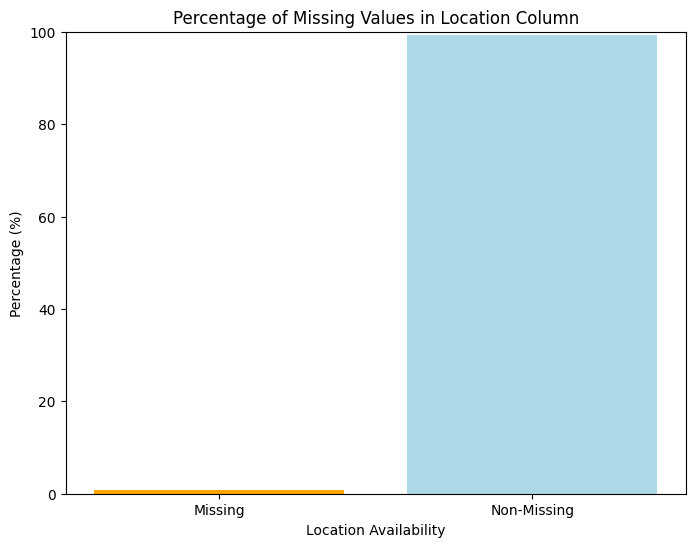

Percentage of missing values in 'keyword' column: 0.80%


In [10]:

# Calculate percentage of missing values in 'location' column
missing_location_percentage = (train_data['keyword'].isnull().sum() / len(train_data)) * 100

# Plot the percentage of missing values
plt.figure(figsize=(8, 6))
plt.bar(['Missing', 'Non-Missing'], [missing_location_percentage, 100 - missing_location_percentage], color=['orange', 'lightblue'])
plt.title('Percentage of Missing Values in Location Column')
plt.xlabel('Location Availability')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()

print("Percentage of missing values in 'keyword' column: {:.2f}%".format(missing_location_percentage))


Very few of the keywords are missing. In this case, I will just replace the NaN values with 'unknown' for keyword.

In [11]:
# Replace missing keywords with 'unknown'
train_data['keyword'] = train_data['keyword'].fillna('unknown')

Next, we'll look at location.

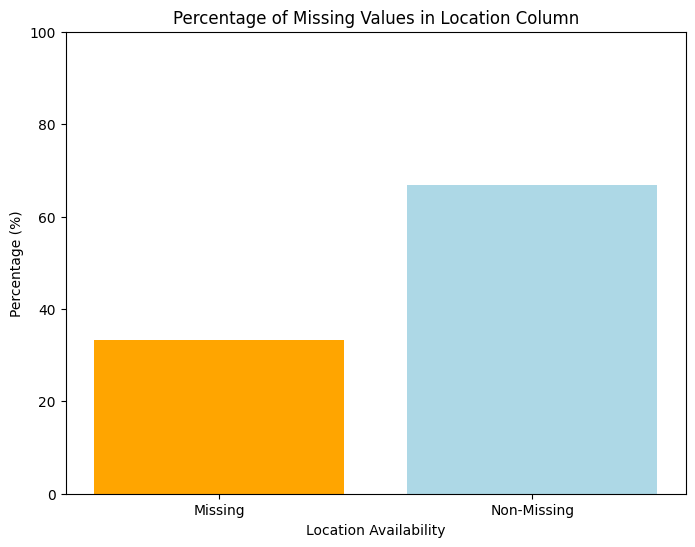

Percentage of missing values in 'location' column: 33.27%


In [12]:

# Calculate percentage of missing values in 'location' column
missing_location_percentage = (train_data['location'].isnull().sum() / len(train_data)) * 100

# Plot the percentage of missing values
plt.figure(figsize=(8, 6))
plt.bar(['Missing', 'Non-Missing'], [missing_location_percentage, 100 - missing_location_percentage], color=['orange', 'lightblue'])
plt.title('Percentage of Missing Values in Location Column')
plt.xlabel('Location Availability')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()

print("Percentage of missing values in 'location' column: {:.2f}%".format(missing_location_percentage))


One third of the entries are missing location data. That's significant. Let's look closer at the location data to decide how to proceed.

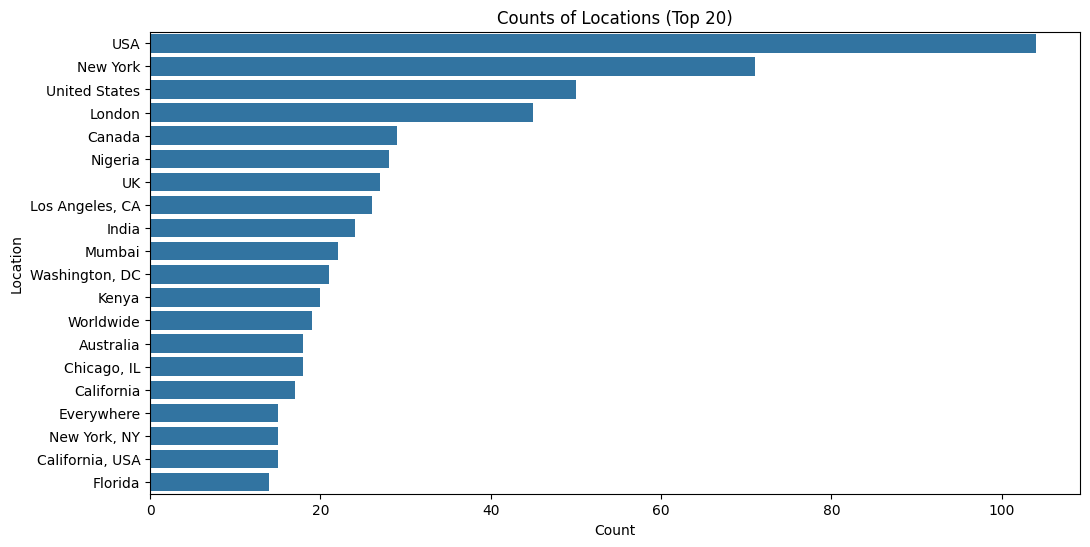

In [13]:
import seaborn as sns

# Plot counts of 'location' column
plt.figure(figsize=(12, 6))
sns.countplot(y='location', data=train_data, order=train_data['location'].value_counts().iloc[:20].index)
plt.title('Counts of Locations (Top 20)')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

We can see that the locations here are varying levels of granularity. Sometimes it gives a city, sometimes a state, and sometimes a country. This is difficult to parse correctly and would be laborious to process. I don't anticipate location will be very relevant to the model, so we can just drop this column.

In [14]:
# drop the location column
train_data.drop(columns = ['location'], inplace = True)

### Clean the Data

First, let's check the data for duplicates. We'll check for duplicate entries based on the 'text' column, or the body of the tweet.

In [15]:
duplicated_text = train_data.duplicated(subset=['text']).sum()
duplicated_text

110

There are 110 duplicates in the training set. Let's see if they are all classified the same - whether the training set labels them as being about a real disaster (1) or not (0).

In [16]:
duplicated_class = train_data.duplicated(subset=['text', 'target']).sum()
duplicated_class

92

Of the 110 duplicates, 92 of them are consistent in their classification. This means that 18 tweets are duplicated, with at least one entry being classified as 1 and at least one entry being classified as 0. This is not a huge number, but we don't want this messing with our model. 

Let's take a look at the duplicates to make sure they are truly duplicates.

In [17]:
duplicates = train_data[train_data.duplicated(subset=['text'], keep=False)].sort_values(by='text')
print( duplicates.head(6) )

        id         keyword                                               text  \
4290  6094        hellfire  #Allah describes piling up #wealth thinking it...   
4299  6105        hellfire  #Allah describes piling up #wealth thinking it...   
4312  6123        hellfire  #Allah describes piling up #wealth thinking it...   
6363  9095  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   
6373  9107  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   
6377  9113  suicide%20bomb  #Bestnaijamade: 16yr old PKK suicide bomber wh...   

      target  tweet_length  
4290       0           138  
4299       0           138  
4312       1           138  
6363       1           140  
6373       1           140  
6377       1           140  


Let's drop these duplicates.

In [18]:
train_data = train_data.drop_duplicates(subset=['text'])

Next, we'll perform a bit of preprocessing on the data:
- make everything lowercase
- remove punctuation
- remove digits
- remove hyperlinks
- remove stopwords
- remove extra spaces
- perform stemming



In [19]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def text_preprocessing(df):
    """
    This function does in place replacement of data so it won't return anything
    """    
    # Convert to lower case
    df['text'] = df['text'].str.lower()

    # Remove punctuation
    df['text'] = df['text'].apply(lambda doc: re.sub(r'[^\w\s]+', '', doc))

    # Remove digits
    df['text'] = df['text'].apply(lambda doc: re.sub(r'\d+', '', doc))

    # Remove links
    df['text'] = df['text'].apply(lambda doc: re.sub(r'http\S+', '', doc))

    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    df['text'] = df['text'].apply(lambda doc: ' '.join([word for word in doc.split() if word not in stop_words]))

    # Remove extra spaces
    df['text'] = df['text'].apply(lambda doc: re.sub(' +', ' ', doc))

    # Stemming
    porter_stemmer = PorterStemmer()
    df['text'] = df['text'].apply(lambda doc: [porter_stemmer.stem(word) for word in word_tokenize(doc)])
    df['text'] = df['text'].apply(lambda words: ' '.join(words))

# process the test
text_preprocessing(train_data)
train_data.head(10)


,id,keyword,text,target,tweet_length
0,1,unknown,deed reason earthquak may allah forgiv us,1,69
1,4,unknown,forest fire near la rong sask canada,1,38
2,5,unknown,resid ask shelter place notifi offic evacu she...,1,133
3,6,unknown,peopl receiv wildfir evacu order california,1,65
4,7,unknown,got sent photo rubi alaska smoke wildfir pour ...,1,88
5,8,unknown,rockyfir updat california hwi close direct due...,1,110
6,10,unknown,flood disast heavi rain caus flash flood stree...,1,95
7,13,unknown,im top hill see fire wood,1,59
8,14,unknown,there emerg evacu happen build across street,1,79
9,15,unknown,im afraid tornado come area,1,52


Let's check out how our processing affected the top words

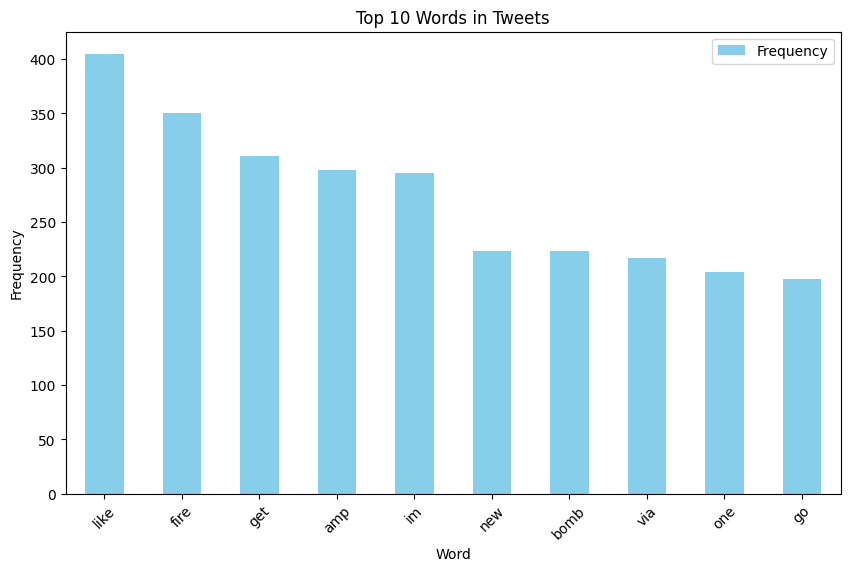

In [20]:
word_counts = preprocess_and_count_words(train_data['text'])
plot_top_words(word_counts, n=10)

This is looking better. In some cases, it is necessary to define custom stop words to be removed from the data set. In this case, I'm going to choose to stop here. We have now processed the data and are ready to begin tokenization.

### Data Preprocessing

##### TF-ID

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical measure used in text analysis to highlight important words in a document relative to a larger collection, called a corpus.

Here's how it works:

- Term Frequency (TF): Measures how often a word appears in a document relative to the total number of words in that document. It indicates the importance of a word within the document.

- Inverse Document Frequency (IDF): Measures the importance of a word across the entire corpus. Words that appear frequently in a document but are rare in the corpus receive a higher IDF score.

- Calculation: TF-IDF is computed by multiplying the TF and IDF scores for each term. This gives higher weight to terms that are frequent within a document but rare across the corpus.

- Normalization (Optional): Sometimes, TF-IDF scores are normalized to avoid bias towards longer documents.

Applications:

TF-IDF scores are used for text classification, clustering, relevance ranking, and information retrieval tasks. Terms with higher TF-IDF scores are considered more important or relevant to the document.

In summary, TF-IDF quantifies the importance of terms within documents by considering their frequency within the document (TF) and their rarity across the corpus (IDF). It's a fundamental technique in natural language processing and information retrieval.







In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from keras_tuner import HyperModel, RandomSearch
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ModelCheckpoint, History, EarlyStopping
import json
import tensorflow as tf
import numpy as np

In [23]:
# Preprocessing text for the model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])
sequences = tokenizer.texts_to_sequences(train_data['text'])
word_index = tokenizer.word_index

We want to feed this into a model that expects a fixed-size input, so we'll pad the data to ensure it is all uniform in length.

In [24]:
# Pad sequences to ensure uniform length
max_length = max(len(s) for s in sequences)
tweet_pad = pad_sequences(sequences, maxlen = max_length, padding = 'post')

The training data has not been split into a trainging and a validation set, so we'll do that now. We'll select 80% of the data as training and 20% as validation.

In [25]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(tweet_pad, train_data['target'], test_size = 0.2, random_state = 42)

Next we'll create the TF-IDF representation. See the top of the section for a more detailed explanation.

In [26]:
# Create TF-IDF representation
tfidf = TfidfVectorizer(max_features = len(word_index) + 1, use_idf = True)
tfidf.fit(train_data['text'])
X_train_tfidf = tfidf.transform(train_data['text']).toarray()

We'll perform the same padding on the test data, though we won't use this until later.

In [27]:
text_preprocessing(test_data)
test_sequences = tokenizer.texts_to_sequences(test_data['text'])

# Pad sequences for uniform length (using the maximum length from the training data)
sequences_padded_test = pad_sequences(test_sequences, maxlen=max_length, padding='post')

Here some helper functions are defined for use later in plotting the metrics of the models and saving the results.

In [28]:
# Helper function that will be used to plot the validation loss, accuracy, and AUC for each trained model.
def plot_history(history):

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(1, len(history["loss"]) + 1), history["loss"], label="train")
    plt.plot(np.arange(1, len(history["val_loss"]) + 1), history["val_loss"], label="validation")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, len(history["accuracy"]) + 1), history["accuracy"], label="train")
    plt.plot(np.arange(1, len(history["val_accuracy"]) + 1), history["val_accuracy"], label="validation")
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [29]:
import pandas as pd

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Best Epoch', 'Best Train Accuracy', 'Best Train Loss', 'Best Val Accuracy', 'Best Val Loss'])

def record_results(model_name, history):
    best_epoch = history.epoch[-1] + 1  # Best epoch is the last epoch
    best_train_accuracy = max(history.history['accuracy'])
    best_train_loss = min(history.history['loss'])
    best_val_accuracy = max(history.history['val_accuracy'])
    best_val_loss = min(history.history['val_loss'])
    
    global results_df
    results_df.loc[len(results_df.index)] = [model_name, best_epoch, best_train_accuracy, best_train_loss, best_val_accuracy, best_val_loss]


## Model Architecture

### Basic LSTM Model

We'll start with a basic Long Short-Term Memory (LSTM) model for binary classification using Keras. We use the 'sequential' basic keras model that allows us to build a neural network by layer. 
- Embedding layer: used for word embedding, which converts words represented as integers into dense vectors of fixed size
- LSTM layer: implements the LSTM network units, a type of RNN architecture designed to overcome the vanishing gradient problem; here with 128 units
- Dense layer: standard fully connected layer; here with one neuron for binary classification

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
record_results('Basic Model', history)



Epoch 1/10


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6479 - loss: 0.6184 - val_accuracy: 0.7868 - val_loss: 0.4727
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8902 - loss: 0.2969 - val_accuracy: 0.7615 - val_loss: 0.6814
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9530 - loss: 0.1516 - val_accuracy: 0.7595 - val_loss: 0.6762
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9697 - loss: 0.1005 - val_accuracy: 0.7522 - val_loss: 0.8836
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9658 - loss: 0.0976 - val_accuracy: 0.7602 - val_loss: 0.7991
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9714 - loss: 0.0785 - val_accuracy: 0.7568 - val_loss: 0.9635
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9766 - loss: 0.0680 - val_accuracy: 0.7468 - val_loss: 1.0107
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9785 - loss: 0.0569 - val_accuracy: 0.730

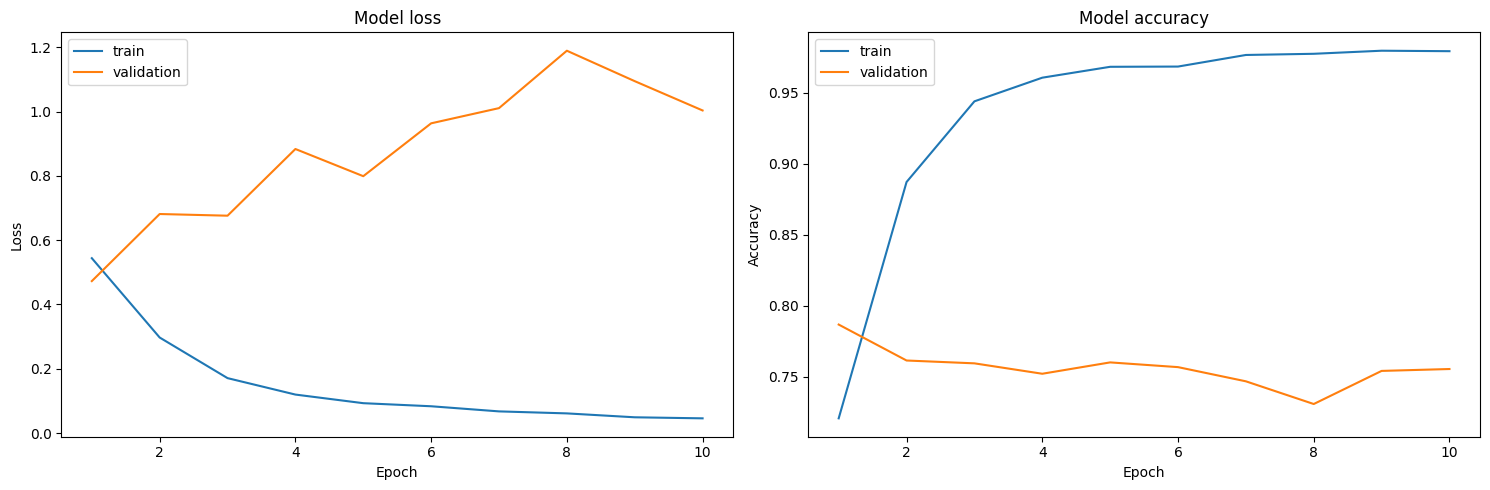

In [31]:
plot_history(history.history)

The validation loss gets quite high, and the validation accuracy does not improve much with epoch number.

### LSTM Model with Dropout Regularization

Here we are adding the following to the LSTM Model: 
- dropout=0.2: sets the dropout rate for input units in the LSTM layer to 0.2, meaning 20% of the input units will be randomly set to zero during training
- recurrent_dropout=0.2: sets the dropout rate for the recurrent connections within the LSTM units to 0.2, meaning 20% of the recurrent connections will be randomly set to zero during training

In [32]:
from keras.layers import Dropout

# Define LSTM model with Dropout
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
record_results('With Dropout', history)


Epoch 1/10


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6441 - loss: 0.6268 - val_accuracy: 0.7615 - val_loss: 0.4948
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8717 - loss: 0.3298 - val_accuracy: 0.7795 - val_loss: 0.4824
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9345 - loss: 0.2035 - val_accuracy: 0.7555 - val_loss: 0.6135
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9597 - loss: 0.1320 - val_accuracy: 0.7595 - val_loss: 0.7254
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9649 - loss: 0.1161 - val_accuracy: 0.7608 - val_loss: 0.8005
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9696 - loss: 0.0963 - val_accuracy: 0.7415 - val_loss: 0.8152
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9718 - loss: 0.0811 - val_accuracy: 0.7462 - val_loss: 0.9724
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9766 - loss: 0.0636 - val_accuracy: 0.754

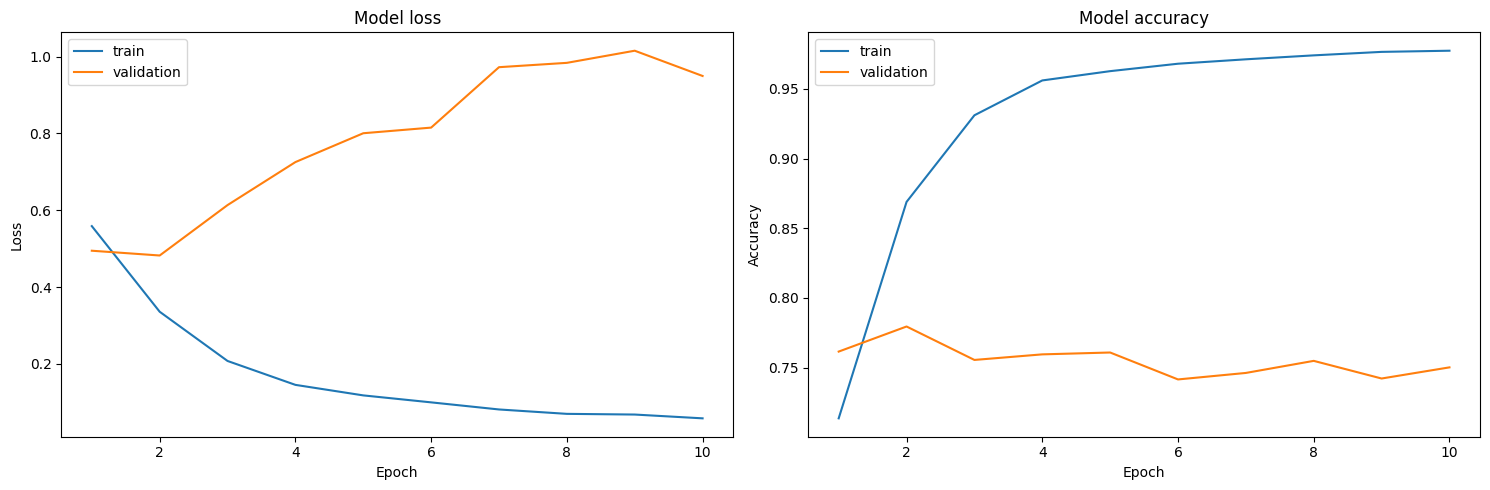

In [33]:
plot_history(history.history)

This is a slight improvement on the basic model, but not a drastic change.

### Bidirectional LSTM Modela

In this iteration we'll incorporate a bidirectional LSTM layer with 64 units. Here we apply a bidirectional wrapper around the LSTM layer, allowing the LSTM units to receive input from both forward and backward directions of the input sequence.

In [34]:
from keras.layers import Bidirectional

# Define LSTM model with Bidirectional LSTM
model_1 = Sequential()
model_1.add(Embedding(len(word_index) + 1, 128))
model_1.add(Bidirectional(LSTM(64)))
model_1.add(Dense(1, activation='sigmoid'))

# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
record_results('Bidirectional', history_1)


Epoch 1/10


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6429 - loss: 0.6100 - val_accuracy: 0.7821 - val_loss: 0.4620
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8877 - loss: 0.2849 - val_accuracy: 0.7841 - val_loss: 0.4949
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9482 - loss: 0.1521 - val_accuracy: 0.7608 - val_loss: 0.6582
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9708 - loss: 0.0928 - val_accuracy: 0.7688 - val_loss: 0.7285
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9784 - loss: 0.0662 - val_accuracy: 0.7735 - val_loss: 0.7746
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9807 - loss: 0.0568 - val_accuracy: 0.7575 - val_loss: 0.9205
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9801 - loss: 0.0426 - val_accuracy: 0.7735 - val_loss: 1.0357
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9845 - loss: 0.0375 - val_accuracy: 0.767

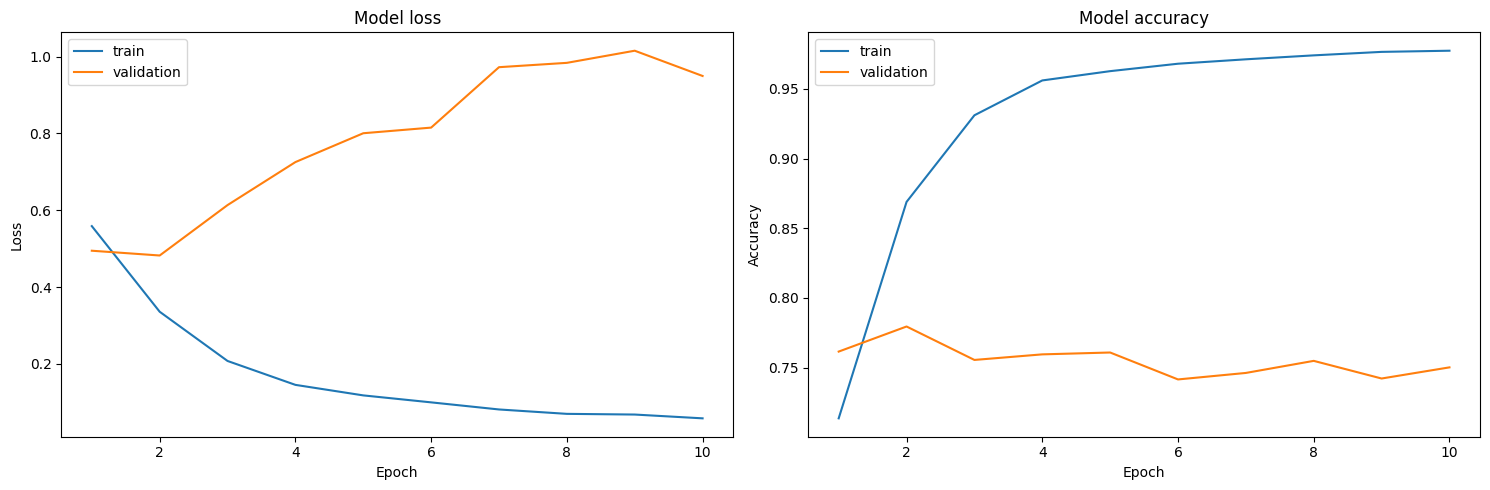

In [35]:
plot_history(history.history)

Again, no major difference in performance.

### Model with Regularization and Early Stopping

Since there are clear signs of overfitting, we'll now implement early stopping and regularization to help prevent this.
- kernel_regularizer='12' applies L2 regularization to the LSTM kernel weights
- we've added a dense layer with ReLU activation and L2 regularization
- we've added a dropout layer with a dropout rate of 0.5

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from keras.callbacks import EarlyStopping

# Define the LSTM model with regularization and dropout
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer='l2')))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

record_results('Early Stopping', history)


Epoch 1/20


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5928 - loss: 2.4398 - val_accuracy: 0.7941 - val_loss: 0.5580
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8487 - loss: 0.4464 - val_accuracy: 0.7875 - val_loss: 0.5110
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8994 - loss: 0.3285 - val_accuracy: 0.7921 - val_loss: 0.5232
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9334 - loss: 0.2426 - val_accuracy: 0.7861 - val_loss: 0.5992
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9469 - loss: 0.1997 - val_accuracy: 0.7841 - val_loss: 0.6640


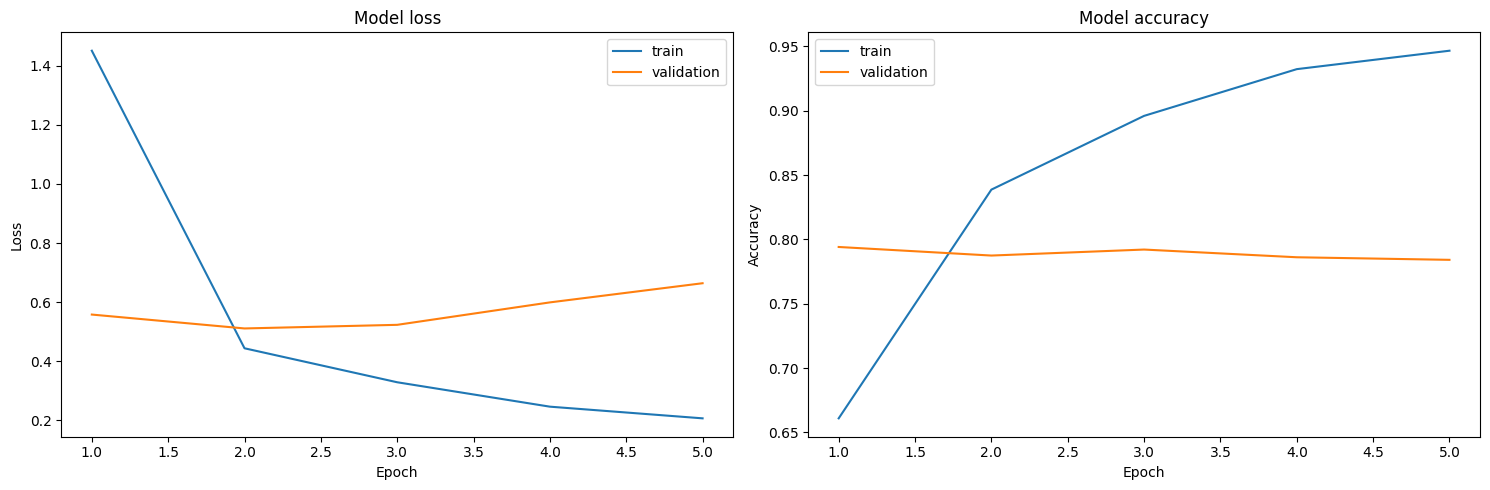

In [37]:
plot_history(history.history)

This does appear to help with overfitting to some degree. Also, the validation loss is lower. 

### GRU Model

Next, we'll compare the LSTM model with a Gated Recurrent Unit (GRU) layer instead of a LSTM layer. GRU is computationally less expensive and has fewer parameters, which can sometimes be advantageous. 

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Bidirectional, Dropout
from keras.callbacks import EarlyStopping

# Define the GRU model with regularization and dropout
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128))
model.add(Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer='l2')))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

record_results('GRU', history)


Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5882 - loss: 2.3822 - val_accuracy: 0.7761 - val_loss: 0.6033
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8491 - loss: 0.4540 - val_accuracy: 0.7868 - val_loss: 0.5060
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9111 - loss: 0.2998 - val_accuracy: 0.7722 - val_loss: 0.5177
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9400 - loss: 0.2419 - val_accuracy: 0.7768 - val_loss: 0.5700
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9543 - loss: 0.1873 - val_accuracy: 0.7715 - val_loss: 0.5878


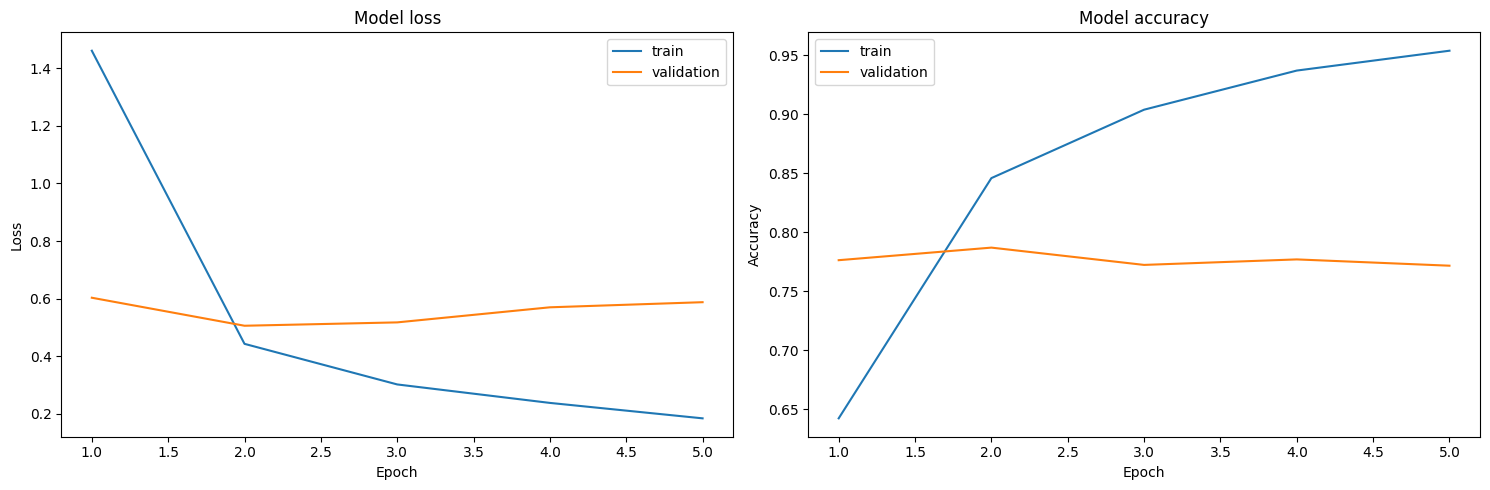

In [39]:
plot_history(history.history)

No major differences.

### Batch Normalization

Here, we'll add batch normalization after the LSTM layer. Batch Normalization normalizes the activations of the previous layer at each batch, which can help accelerate the training process and improve overfitting.

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Define the LSTM model with regularization and dropout
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer='l2')))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

record_results('Batch Normalization', history)





Epoch 1/20


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6404 - loss: 2.7776 - val_accuracy: 0.6949 - val_loss: 1.0316
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8819 - loss: 0.6128 - val_accuracy: 0.7801 - val_loss: 0.6770
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9427 - loss: 0.2886 - val_accuracy: 0.7422 - val_loss: 0.5707
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9561 - loss: 0.1978 - val_accuracy: 0.7595 - val_loss: 0.6210
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9626 - loss: 0.1476 - val_accuracy: 0.7595 - val_loss: 0.8434
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9731 - loss: 0.1198 - val_accuracy: 0.7668 - val_loss: 0.6435


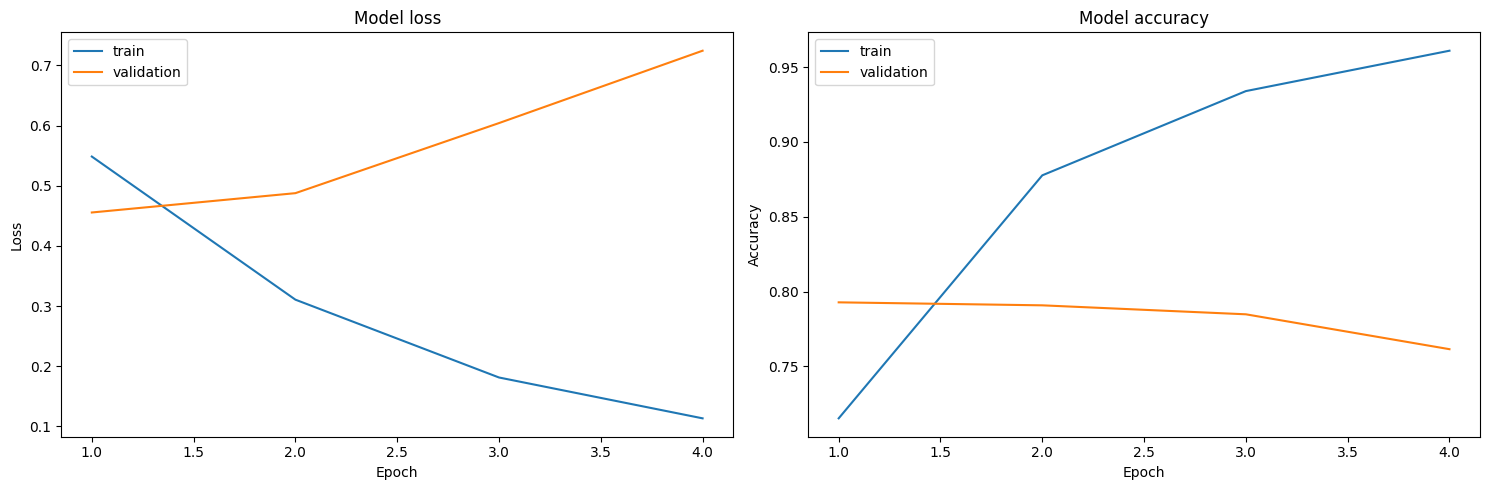

In [46]:
plot_history(history.history)

## Results and Analysis

### Hyperparameter Tuning

In order to determine the best combination of hyperparameters, we'll perform hyperparameter tuning on the model, testing the following:
- LSTM Units: 32, 64, 128
- Dense Units: 16, 32, 64
- Batch Size: 16, 32, 64

In [41]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, BatchNormalization, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Function to create the model
def create_model(lstm_units=64, dense_units=32, batch_size=32):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 128))
    model.add(Bidirectional(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01))))
    model.add(BatchNormalization())
    model.add(Dense(dense_units, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define custom function for grid search with early stopping
def grid_search_with_early_stopping(X_train, y_train, X_val, y_val, param_grid, cv=3):
    best_score = 0
    best_params = {}

    for lstm_units in param_grid['lstm_units']:
        for dense_units in param_grid['dense_units']:
            for batch_size in param_grid['batch_size']:
                model = create_model(lstm_units=lstm_units, dense_units=dense_units, batch_size=batch_size)
                early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
                model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])
                score = model.evaluate(X_val, y_val, verbose=0)[1]
                if score > best_score:
                    best_score = score
                    best_params = {'lstm_units': lstm_units, 'dense_units': dense_units, 'batch_size': batch_size}

    return best_params, best_score

# Define the grid search parameters
param_grid = {
    'lstm_units': [32, 64, 128],
    'dense_units': [16, 32, 64],
    'batch_size': [16, 32, 64]
}

# Perform grid search with early stopping
best_params, best_score = grid_search_with_early_stopping(X_train, y_train, X_val, y_val, param_grid)

# Output the best parameters and score
print("Best score:", best_score)
print("Best parameters:", best_params)




Epoch 1/20


376/376 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6479 - loss: 1.9095 - val_accuracy: 0.7062 - val_loss: 0.7914
Epoch 2/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8656 - loss: 0.5048 - val_accuracy: 0.7888 - val_loss: 0.5369
Epoch 3/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9211 - loss: 0.2887 - val_accuracy: 0.7388 - val_loss: 0.7102
Epoch 4/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9368 - loss: 0.2192 - val_accuracy: 0.7688 - val_loss: 0.5997
Epoch 5/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9429 - loss: 0.2070 - val_accuracy: 0.7755 - val_loss: 0.6373
Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6265 - loss: 2.2589 - val_accuracy: 0.7282 - val_loss: 0.9157
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8577 - loss: 0.5909 - val_accuracy: 0.7868 - val_loss: 0.6363
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9262 - loss: 0.3314 - val_accuracy: 0.779

Next, we'll take the best parameters and implement a model using those.

In [42]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Define the LSTM model with best parameters
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

record_results('Best Params', history)


Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6336 - loss: 0.6241 - val_accuracy: 0.7928 - val_loss: 0.4556
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8826 - loss: 0.3068 - val_accuracy: 0.7908 - val_loss: 0.4877
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9406 - loss: 0.1672 - val_accuracy: 0.7848 - val_loss: 0.6042
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9629 - loss: 0.1066 - val_accuracy: 0.7615 - val_loss: 0.7244


In [43]:
results_df

,Model,Best Epoch,Best Train Accuracy,Best Train Loss,Best Val Accuracy,Best Val Loss
0,Basic Model,10,0.979673,0.045849,0.786809,0.472747
1,With Dropout,10,0.977341,0.058572,0.779480,0.482356
2,Bidirectional,10,0.984838,0.031531,0.784144,0.461973
3,Early Stopping,5,0.946684,0.206656,0.794137,0.510960
4,GRU,5,0.953682,0.184623,0.786809,0.506042
5,Batch Normalization,6,0.961846,0.141102,0.780147,0.570662
6,Best Params,4,0.961013,0.113498,0.792805,0.455588


Next, we'll create a function to use the model to predict the target of the test set, and save the predictions to a csv file.

In [44]:
import numpy as np
import pandas as pd

def predict_and_save(model, test_df, sequences_padded_test, output_filename='predictions.csv'):
    """
    Predicts the target on a test dataset using the provided model and saves the predictions to a CSV file.
    
    Args:
    - model: Keras model object trained on the training data
    - test_df: DataFrame containing the test data
    - sequences_padded_test: Padded sequences of the test data
    - output_filename: Name of the CSV file to save the predictions
    
    Returns:
    None
    """
    # Predict on test data
    predictions = model.predict(sequences_padded_test)
    
    # Round predictions to binary values
    binary_predictions = np.round(predictions).astype(int)
    
    # Save predictions to CSV file
    output_df = pd.DataFrame({'id': test_df['id'], 'target': binary_predictions.flatten()})
    output_df.to_csv(output_filename, index=False)


Using the final model to predict on the test set and creating an output CSV to be submitted to the Kaggle competition.

In [45]:
predict_and_save(model, test_data, sequences_padded_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


## Conclusion

Overall, the simpler models performed as well as the more architecturally complex models. Measures to prevent overfitting did help, but could still be improved.

The best model achieved a Kaggle score of 0.78, which has room for improvement.

There are many avenues for continued exploration and improvement on the model, including:
- Experiment with different hyperparameters such as learning rate and regularization strength
- Explore different model architectures such as varying the number of layers, types of recurrent units (LSTM, GRU), incorporating attention mechanisms, or using transformer-based architectures like BERT or GPT
- Implement data augmentation techniques such as random rotations or translations
- Investigate ensemble methods by combining predictions from multiple models to potentially improve performance. This could involve training multiple LSTM/GRU models with different initializations or architectures and aggregating their predictions.
